<a href="https://colab.research.google.com/drive/1tElT3FhddabqCyJKFH27rhnyXJTqrzke?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

In [1]:
import pandas as pd
import numpy as np

In [2]:
all_data = pd.read_csv('forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [3]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

The quality of classification/regression by the k Nearest Neighbors method depends on several parameters:
* the number of neighbors `n_neighbors`
* the distance metric between objects `metric`
* the weights of neighbors (the neighbors of the test example can enter with different weights, for example, the further the example, the less its "voice" is taken into account) `weights`


Train the `KNeighborsClassifier` on the dataset.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='uniform')
clf.fit(train_feature_matrix, train_labels)

y_pred = clf.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

0.7365

Let's select the parameters of our model:

* Iterate over the grid from `1` to `10` for the number of neighbors parameter
* Also, try using different metrics: `['manhattan', 'euclidean']`
* Try using different weight calculation strategies: `[‘uniform’, ‘distance’]`

In [29]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean'],
}

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(train_feature_matrix, train_labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Let's output the best parameters

In [30]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(4), 'weights': 'distance'}

Using the optimal number of neighbors found, calculate the probabilities of belonging to classes for the test sample (`.predict_proba`).

In [31]:
optimal_clf = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights='distance')
optimal_clf.fit(train_feature_matrix, train_labels)
pred_prob = optimal_clf.predict_proba(test_feature_matrix)

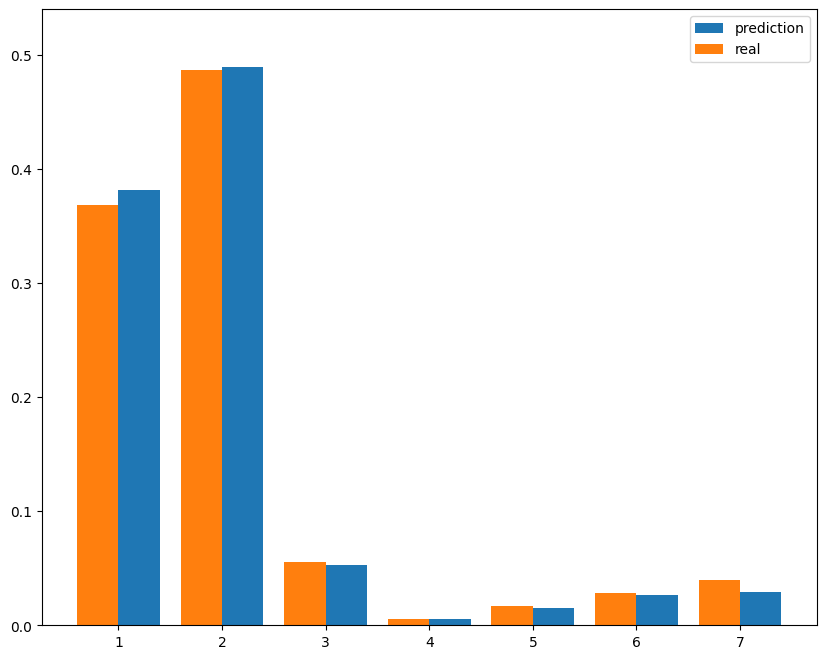

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

## Conclusion

What is the quality of the model on the test sample? Compare it with the quality of logistic regression. Which model is better? Why? What are the pros and cons of the k Nearest Neighbors method? Plot the ROC curve for the k Nearest Neighbors method. Calculate the area under the ROC curve (AUC-ROC).

In [34]:
accuracy_knn = accuracy_score(test_labels, optimal_clf.predict(test_feature_matrix))
print(accuracy_knn)

0.7845


In [36]:
from sklearn.linear_model import LogisticRegression

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
train_feature_matrix_scaled = scaler.fit_transform(train_feature_matrix)
test_feature_matrix_scaled = scaler.transform(test_feature_matrix)

clf = LogisticRegression(C=2, max_iter=1000)
clf.fit(train_feature_matrix_scaled, train_labels)
y_pred = clf.predict(test_feature_matrix_scaled)

score_log_regr = clf.score(test_feature_matrix_scaled, test_labels)

In [42]:
score_log_regr

0.7195

В данном случае, на заданном датасете kNN показала себя лучше, чем Logistic Regression. Но в общем случае возможен и обратный результат.

**Плюсы kNN**:


*   Быстрое обучение модели
*   Идея является достаточно простой
*   Не требует гипотез о статистических свойствах данных

**Минусы kNN**:

*   Чувствителен к выбросам
*   Высокая вычислительная сложность
*   Зависит от выбора метрики и числа соседей



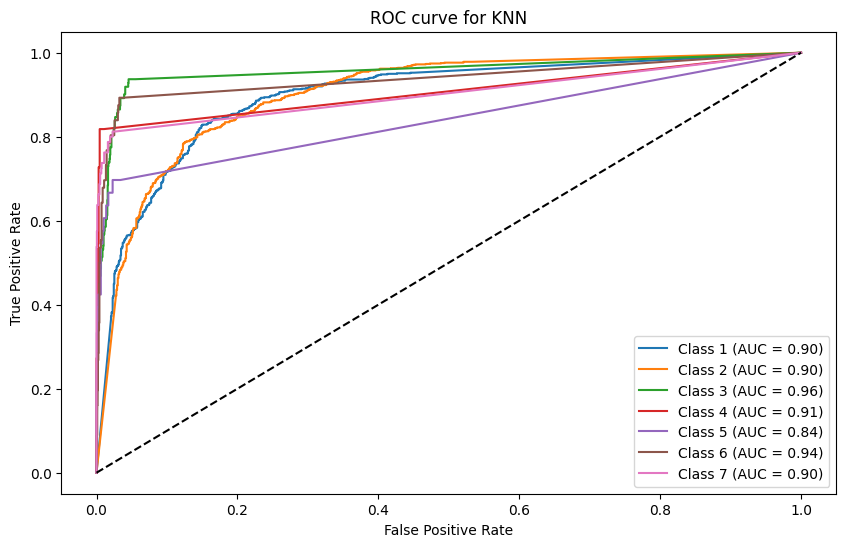

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

test_labels_bin = label_binarize(test_labels, classes=np.unique(labels))
y_pred_proba = optimal_clf.predict_proba(test_feature_matrix)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(labels))):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(len(np.unique(labels))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN')
plt.legend()
plt.show()